In [1]:
# Questions 3 & 4)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5 - Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the original csv file.

A . ** TODO **

6 - Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [2]:
# Questions 5 & 6)

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', 
                     skipfooter=5, 
                     usecols=[0,1,2], 
                     header=0, 
                     names=['Country', 'Year', 'GDP Per Capita'])

<ipython-input-2-888f48a420be>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv',


In [3]:
gdp_df.isna().any()

Country           False
Year              False
GDP Per Capita    False
dtype: bool

7 - Q. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

A. gdp_df has three columns and 6866 rows.  Its columns' data types are object, int64, and float64.

In [4]:
# Question 7)

gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6866 non-null   object 
 1   Year            6866 non-null   int64  
 2   GDP Per Capita  6866 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.0+ KB


8 - Q. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

A. Some countries are missing data for the first few years, and then the number of observations per year increases in more recent years. 

In [5]:
# Question 8)

gdp_df['Year'].max() 

2019

In [6]:
# Question 8)

gdp_df['Year'].min()

1990

In [7]:
gdp_df['Year'].value_counts(ascending=True)

1990    206
1991    207
1992    209
1993    212
1994    214
1995    221
1996    221
1998    223
1997    223
1999    224
2000    231
2019    231
2001    232
2002    233
2003    233
2004    234
2005    234
2007    235
2006    235
2008    235
2010    236
2009    236
2011    237
2018    237
2012    237
2013    238
2015    238
2017    238
2016    238
2014    238
Name: Year, dtype: int64

9 - Q. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

A. 238 countries appear in the data set.  The countries least represented seem to be very small countries.  I am wondering if some of these countries, for example the Cayman Islands, might be tax havens that are not very forthcoming with their GDP.

In [8]:
# Question 9)

gdp_df['Country'].value_counts()

Japan                        30
Albania                      30
Canada                       30
Middle income                30
Bolivia                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

10 - Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [9]:
# Question 10)

gdp_2014 = gdp_df[gdp_df['Year']==2014]    # CAN ALSO RUN gdp_df[gdp_df['Year'].isin(['2014'])]

In [10]:
gdp_2014

,Country,Year,GDP Per Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


11 - Use .describe() to find the summary statistics for GDP per capita in 2014.

In [11]:
# Question 11)

gdp_2014.describe()

,Year,GDP Per Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


12 - Q. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

A. The distribution is very right-skewed, with most observations falling well below the mean value and a few very high outliers.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'GDP Per Capita'}>]], dtype=object)

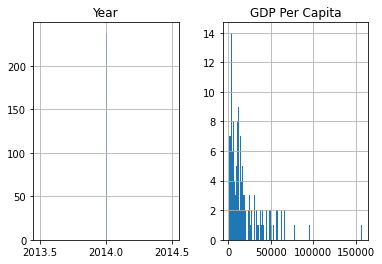

In [12]:
# Question 12)

gdp_2014.hist(bins=238)

13 - Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [13]:
# Question 13)

gdp_2014.nlargest(5, 'GDP Per Capita')

,Country,Year,GDP Per Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [14]:
gdp_2014.nsmallest(5, 'GDP Per Capita')

,Country,Year,GDP Per Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


14 - Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [15]:
# Question 14)

gdp_pivoted = pd.pivot_table(gdp_df[gdp_df['Year'].isin([1990, 2017])], 
                             values=['GDP Per Capita'], 
                             index=['Country'], 
                             columns=['Year']) 

In [16]:
gdp_pivoted = gdp_pivoted.dropna(0)

In [17]:
gdp_pivoted.isna().any()

                Year
GDP Per Capita  1990    False
                2017    False
dtype: bool

In [18]:
gdp_pivoted

GDP Per Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
Arab World             9694.667544  14555.474921
...                            ...           ...
Uzbekistan             3416.724096   6518.804687
Vanuatu                2888.309393   3116.645194
Vietnam                1673.249634   7155.745829
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238

[206 rows x 2 columns]

15 - Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [19]:
#  Question 15) 

pivx100 = np.multiply(100, np.subtract(gdp_pivoted.iloc[:, [1]], gdp_pivoted.iloc[:, [0]]))

pct_change = np.true_divide(pivx100, gdp_pivoted.iloc[:, [0]])

<ipython-input-19-f7c8dd276d68>:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pivx100 = np.multiply(100, np.subtract(gdp_pivoted.iloc[:, [1]], gdp_pivoted.iloc[:, [0]]))


In [21]:
pct_change

,GDP Per Capita
Year,2017
Country,
Albania,164.556297
Algeria,34.197756
Angola,26.411194
Antigua and Barbuda,28.335391
Arab World,50.138980
...,...
Uzbekistan,90.791077
Vanuatu,7.905517


In [22]:
# pct_change.type() GETS         'DataFrame' object has no attribute 'type'

pct_change.dtypes()    # GETTING TypeError: 'Series' object is not callable

TypeError: 'Series' object is not callable

16 - How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [ ]:
# Question 16)

17 - Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Bonus: Put both line charts on the same plot.

In [ ]:
# Question 17)

# pct_change[pct_change == pct_change.max()]
pct_change.max()

18 - Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [23]:
# Question 18)

continents = pd.read_csv('../data/continents.csv')

In [24]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19 - Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [25]:
# Question 19)  -- ** TO DO ** CAN TRY WITH .merge() METHOD

gdp_df = gdp_df.join(continents.set_index('Country'), on='Country')

In [26]:
gdp_df

,Country,Year,GDP Per Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
6861,Zimbabwe,1996,3520.430146,Africa
6862,Zimbabwe,1995,3226.413930,Africa
6863,Zimbabwe,1994,3263.934978,Africa
6864,Zimbabwe,1993,3033.504852,Africa


20 - Determine the number of countries per continent. Create a bar chart showing this.

In [27]:
# Question 20) - Number of countries per continent - DOING ONLY MOST RECENT YEAR TO AVOID DUPLICATES

# gdp_df.groupby(gdp_df['Country'].unique()) THROWS "Grouper and axis must be the same length" ERROR

gdp_df[gdp_df['Year']==2019].groupby(['Continent','Year'])['Country'].count()

Continent      Year
Africa         2019    49
Asia           2019    42
Europe         2019    44
North America  2019    24
Oceania        2019    12
South America  2019    11
Name: Country, dtype: int64

In [28]:
# TEST - LIST SOUTH AMERICAN COUNTRIES JUST TO TEST GROUPBY ACCURACY

# ** TODO - gdp_df([gdp_df['Year']==2019] & [gdp]).groupby(['Continent','Year'])['Country'].count() **

<AxesSubplot:xlabel='Continent,Year'>

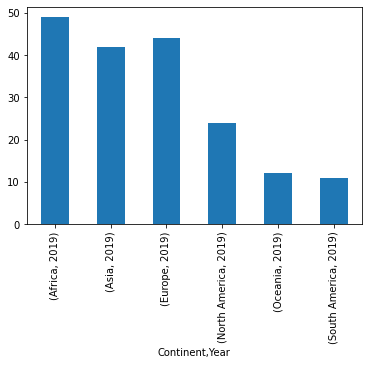

In [29]:
gdp_df[gdp_df['Year']==2019].groupby(['Continent','Year'])['Country'].count().plot(kind = 'bar')

21 - Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [30]:
# Question 21) Seaborn box plot of GDP per capita by continent in 2014

gdp_df[gdp_df['Year']==2014].groupby('Continent')['GDP Per Capita'].sum()

Continent
Africa           2.928373e+05
Asia             1.111780e+06
Europe           1.532948e+06
North America    6.189731e+05
Oceania          1.621359e+05
South America    1.707547e+05
Name: GDP Per Capita, dtype: float64

In [31]:
gdp_cont_2014 = gdp_df[gdp_df['Year']==2014].groupby('Continent')['GDP Per Capita'].sum()

<AxesSubplot:xlabel='Continent'>

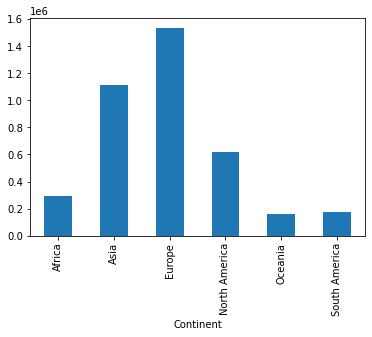

In [32]:
# WORKS FINE IN matplotlib

gdp_cont_2014.plot(kind='bar')

In [ ]:
# WEIRD ERRORS IN seaborn - SEE https://stackoverflow.com/questions/63094143/valueerror-could-not-interpret-input-in-seaborn,
#                               https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

ax = sns.boxplot(data=gdp_cont_2014, x='Continent', y='GDP Per Capita')
ax.set(xlabel='Continent', y='GDP Per Capita')
plt.show()

22 - Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

23 - Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [33]:
# Questions 22 & 23)  -- CAN skipfooter=191 TO DELETE TRASH AT BOTTOM, BUT THEN GET ParserError: ',' expected after '"' 
#                        (ALSO IF YOU SPECIFY engine=python)

internet_df = pd.read_csv('../data/internet_use.csv', 
                          header=0, 
                          usecols=[0,1,2], 
                          names=['Country', 'Year', 'Internet_Users_Pct'])

In [34]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4
...,...,...,...
4671,176,NTIA/CPS survey.,NaN
4672,177,"Pew Internet Project, Internet",Broadband and cell phone statistics
4673,178,Estimated based on Survey's results. Populatio...,NaN
4674,179,Preliminary. Country estimate.,NaN


24 - How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [35]:
# Question 24)

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4676 non-null   object
 1   Year                4676 non-null   object
 2   Internet_Users_Pct  4496 non-null   object
dtypes: object(3)
memory usage: 109.7+ KB


In [36]:
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce')

25 - Q. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

A. ** TODO **

In [37]:
# Question 25)

# internet_df['Year'][internet_df['Internet_Users_Pct']==0]   # .unique()

internet_df[internet_df['Internet_Users_Pct']==0] 

,Country,Year,Internet_Users_Pct
14,Afghanistan,1990,0.0
35,Albania,1990,0.0
57,Algeria,1990,0.0
58,American Samoa,1990,0.0
77,Andorra,1990,0.0
...,...,...,...
4408,Viet Nam,1990,0.0
4430,Virgin Islands (U.S.),1990,0.0
4450,Yemen,1990,0.0
4472,Zambia,1990,0.0


26 - Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [38]:
# Question 26)  MUST CONVERT ['Year'] DATA TYPE

gdp_df.join(internet_df.set_index('Country'), on='Country')

ValueError: columns overlap but no suffix specified: Index(['Year'], dtype='object')

In [ ]:
gdp_df.info()

In [ ]:
internet_df.info()

In [ ]:
internet_df['Year'].astype(np.int64)

26 - Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.